## Alguns insights de uma base de dados da distribuição de bolsas do Prouni 

Dataset disponível em: http://dadosabertos.mec.gov.br/images/conteudo/prouni/2020/ProuniRelatorioDadosAbertos2020.csv

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [35]:
dados = pd.read_csv('ProuniRelatorioDadosAbertos2020.csv',sep=";", encoding='ISO-8859-1')

In [36]:
dados.head(5)

,ANO_CONCESSAO_BOLSA,CODIGO_EMEC_IES_BOLSA,NOME_IES_BOLSA,MUNICIPIO,CAMPUS,TIPO_BOLSA,MODALIDADE_ENSINO_BOLSA,NOME_CURSO_BOLSA,NOME_TURNO_CURSO_BOLSA,CPF_BENEFICIARIO,SEXO_BENEFICIARIO,RACA_BENEFICIARIO,DATA_NASCIMENTO,BENEFICIARIO_DEFICIENTE_FISICO,REGIAO_BENEFICIARIO,UF_BENEFICIARIO,MUNICIPIO_BENEFICIARIO
0,2020,322,UNIVERSIDADE PAULISTA,IPATINGA,IPATINGA,INTEGRAL,EAD,PEDAGOGIA,CURSO A DIST¶NCIA,991.XXX.XXX-91,F,Parda,11/08/1973,N,SUDESTE,MG,GOVERNADOR VALADARES
1,2020,163,UNIVERSIDADE ESTµCIO DE Sµ,FORTALEZA,EAD VIA CORPVS - CE,INTEGRAL,EAD,MARKETING,CURSO A DIST¶NCIA,067.XXX.XXX-01,M,Parda,13/05/1987,N,NORDESTE,CE,FORTALEZA
2,2020,17670,FACULDADE DE QUIXERAMOBIM,QUIXERAMOBIM,FACULDADE DE QUIXERAMOBIM - UNIQ,INTEGRAL,PRESENCIAL,FARMµCIA,NOTURNO,623.XXX.XXX-27,M,Parda,23/07/2001,N,NORDESTE,CE,MOMBACA
3,2020,203,UNIVERSIDADE SÇO JUDAS TADEU,SAO PAULO,PAULISTA,PARCIAL,PRESENCIAL,DIREITO,MATUTINO,089.XXX.XXX-40,F,Branca,04/04/2003,N,NORDESTE,BA,IBITITA
4,2020,203,UNIVERSIDADE SÇO JUDAS TADEU,SAO PAULO,PAULISTA,INTEGRAL,PRESENCIAL,DIREITO,MATUTINO,173.XXX.XXX-09,F,Branca,07/12/1977,N,SUDESTE,SP,SAO PAULO


### Conhecendo os Dados

In [37]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166830 entries, 0 to 166829
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   ANO_CONCESSAO_BOLSA             166830 non-null  int64 
 1   CODIGO_EMEC_IES_BOLSA           166830 non-null  int64 
 2   NOME_IES_BOLSA                  166830 non-null  object
 3   MUNICIPIO                       166830 non-null  object
 4   CAMPUS                          166830 non-null  object
 5   TIPO_BOLSA                      166830 non-null  object
 6   MODALIDADE_ENSINO_BOLSA         166830 non-null  object
 7   NOME_CURSO_BOLSA                166792 non-null  object
 8   NOME_TURNO_CURSO_BOLSA          166830 non-null  object
 9   CPF_BENEFICIARIO                166830 non-null  object
 10  SEXO_BENEFICIARIO               166830 non-null  object
 11  RACA_BENEFICIARIO               166830 non-null  object
 12  DATA_NASCIMENTO               

In [38]:
dados.shape

(166830, 17)

In [39]:
dados.describe()

,ANO_CONCESSAO_BOLSA,CODIGO_EMEC_IES_BOLSA
count,166830.0,166830.000000
mean,2020.0,2270.745022
std,0.0,4063.329275
min,2020.0,10.000000
25%,2020.0,322.000000
50%,2020.0,1196.000000
75%,2020.0,1952.000000
max,2020.0,24488.000000


In [40]:
dados.isnull().sum().sort_values(ascending=False).head(5)

NOME_CURSO_BOLSA       38
ANO_CONCESSAO_BOLSA     0
CPF_BENEFICIARIO        0
UF_BENEFICIARIO         0
REGIAO_BENEFICIARIO     0
dtype: int64

In [41]:
# A média de valores missing no dataframe
dados.isna().mean().sort_values(ascending=False).head(1)

NOME_CURSO_BOLSA    0.000228
dtype: float64

In [42]:
#Como a média de valores missing é baixíssima, as linhas com esses valores podem ser excluidas sem prejuizos a análise
#dados.dropna(axis = 0)

In [43]:
#Convertendo a coluna de "DATA_NASCIMENTO" EM DATETIME
dados['DATA_NASCIMENTO'] = pd.to_datetime(dados['DATA_NASCIMENTO'])

In [44]:
dados['DATA_NASCIMENTO'].head(5)

0   1973-11-08
1   1987-05-13
2   2001-07-23
3   2003-04-04
4   1977-07-12
Name: DATA_NASCIMENTO, dtype: datetime64[ns]

In [45]:
# Criando a coluna Idade
from datetime import datetime, date
hoje = date.today().year
hoje

2022

In [46]:
ano_nasc = pd.DatetimeIndex(dados['DATA_NASCIMENTO']).year
ano_nasc.sort_values(ascending=True)

Int64Index([1929, 1946, 1946, 1947, 1947, 1950, 1950, 1952, 1953, 1953,
            ...
            2009, 2012, 2017, 2019, 2020, 2020, 2020, 2020, 2020, 2020],
           dtype='int64', name='DATA_NASCIMENTO', length=166830)

## Visualizando algumas variáveis

### Os 10 cursos mais escolhidos

<AxesSubplot:title={'center':'Qualtidade de bolsas por faixa etaria'}>

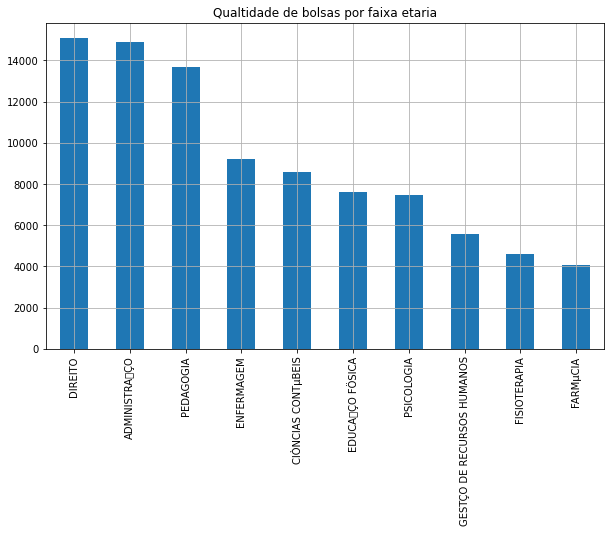

In [47]:
plt.figure(figsize=[10, 6])
dados.NOME_CURSO_BOLSA.value_counts().head(10).plot.bar(title = "Qualtidade de bolsas por faixa etaria", grid = True)

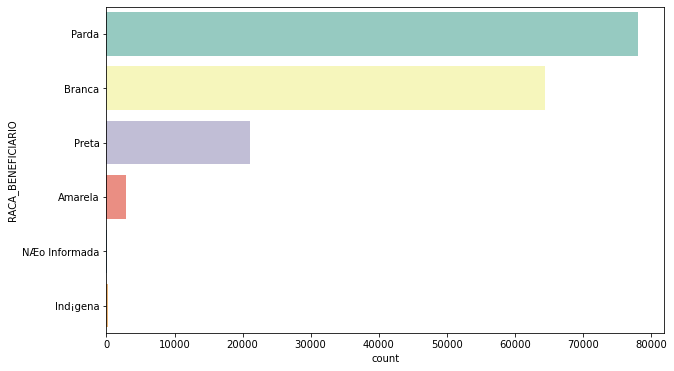

In [48]:
#Raça que mais receberam bolsa
plt.figure(figsize=[10, 6])
ax = sns.countplot(y="RACA_BENEFICIARIO", data=dados, palette="Set3")

In [49]:
dados['DATA_NASCIMENTO'].value_counts()

1969-12-31    362
2002-04-03    159
2002-02-25    156
2002-03-01    154
2002-08-01    149
             ... 
1965-04-19      1
1970-03-08      1
1967-03-21      1
1979-12-21      1
2019-10-23      1
Name: DATA_NASCIMENTO, Length: 11793, dtype: int64

### Porcentagem de bolsa por estado

In [50]:
dados.reset_index(inplace=True, drop=False)

In [51]:
bolsa_regiao = dados[["index","REGIAO_BENEFICIARIO"]]

In [52]:
# AGRUPANDO POR TIPO DE BOLSAS E ANO, E AGREGANDO EM UMA NOVA COLUNA UMA CONTAGEM DE BOLSAS POR ANO
bolsa_regiao = bolsa_regiao.groupby(["REGIAO_BENEFICIARIO"]).agg({'index':['count']}).reset_index()

In [53]:
bolsa_regiao.columns = ['Regiao','Porcentagem de Bolsas']
bolsa_regiao = bolsa_regiao.set_index('Regiao')
c = ['#836FFF','#5F9EA0','#ADD8E6','#708090','#40E0D0']

<AxesSubplot:title={'center':'Porcentagem de Bolsas por região'}>

<Figure size 864x432 with 0 Axes>

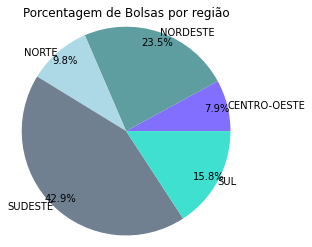

In [54]:
plt.figure(figsize=[12, 6])
bolsa_regiao.plot.pie(y='Porcentagem de Bolsas', legend = False, radius = 1.2, autopct='%1.1f%%',
                      pctdistance=0.90, labeldistance=1, title = "Porcentagem de Bolsas por região", ylabel='',colors=c)

### Distribuição por sexo nos 10 primeiros estados

In [55]:
siglas_estados = dados['UF_BENEFICIARIO'].value_counts()[:10].index
estados_sexo = dados[['SEXO_BENEFICIARIO', 'UF_BENEFICIARIO']] \
                .groupby('UF_BENEFICIARIO')['SEXO_BENEFICIARIO'] \
                .value_counts().unstack().loc[siglas_estados]

estados_sexo['sum'] = estados_sexo.sum(axis=1)
dados_estados_sex = (estados_sexo.T / estados_sexo['sum']).T[['M', 'F']]

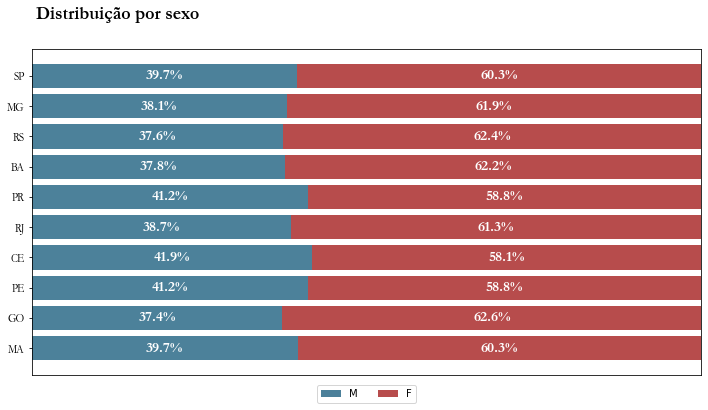

In [56]:
fig, ax = plt.subplots(1,1,figsize=(12, 6),)

ax.barh(dados_estados_sex.index[::], dados_estados_sex['M'], 
        color='#004c70', alpha=0.7, label='M')
ax.barh(dados_estados_sex.index[::], dados_estados_sex['F'], left=dados_estados_sex['M'], 
        color='#990000', alpha=0.7, label='F')

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticklabels(dados_estados_sex.index[::], fontfamily='garamond', fontsize=11)

# porcentagem de homens
for i in dados_estados_sex.index:
    ax.annotate(f"{dados_estados_sex['M'][i]*100:.3}%", 
                   xy=(dados_estados_sex['M'][i]/2, i),
                   va = 'center', ha='center',fontsize=15, fontweight='bold', fontfamily='garamond',
                   color='white')
# porcentagem de mulheres
for i in dados_estados_sex.index:
    ax.annotate(f"{dados_estados_sex['F'][i]*100:.3}%", 
                   xy=(dados_estados_sex['M'][i]+dados_estados_sex['F'][i]/2, i),
                   va = 'center', ha='center',fontsize=15, fontweight='bold', fontfamily='garamond',
                   color='white')
    

fig.text(0.13, 0.95, 'Distribuição por sexo', fontsize=18, fontweight='bold', fontfamily='garamond')   
  

    
ax.legend(loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.1))
plt.gca().invert_yaxis()
plt.show()